In [3]:
from scipy.stats import truncnorm
import pandas as pd
import numpy as np
import itertools
import datetime
import tqdm
import sys
import os

def flatten_list(list_array):
    return list(itertools.chain(*list_array))

sys.path.insert(0, "../")

from global_config import config

results_dir           = config.get_property('results_dir')
results2_dir          = config.get_property('results2_dir')
data_dir              = config.get_property('data_dir')
paper_dir             = config.get_property('paper_dir')
data_db_dir           = config.get_property('data_db_dir')

feb_hosp_records_path = os.path.join(data_db_dir, 'long_files_8_25_2021')
path_to_save          = os.path.join(results_dir, "real_testing", "community")
COLOR_LIST1           = ["#F8AFA8", "#FDDDA0", "#F5CDB4", "#74A089"]


In [4]:
sys.path.insert(0, "../metapop")

from utils_data_metapop import create_population_data, create_time_transfers

path_to_ward_counts = os.path.join(data_db_dir, "long_files_8_25_2021", "counts_ward.csv" )
path_to_ward_transf = os.path.join(data_db_dir, "long_files_8_25_2021", "transfers_ward.csv" )

A_df, D_df, H_df, tests_df, Hmean_df = create_population_data(path_to_ward_counts)

num_wards  = len(Hmean_df)
ward_names = list(Hmean_df.index)
M_df       = create_time_transfers(path_to_ward_transf, num_wards=num_wards, ward_names=ward_names)


In [6]:
tests_df.T

ward,Aln 1 Nicu-Allen Hospital-Allen,Aln 1 Nicu-Mschony-Chony,Aln 1 River West-Allen Hospital-Allen,Aln 1 River West-Harkness Pavilion-Columbia,Aln 1 River West-Milstein Hospital-Columbia,Aln 1 River West-Mschony-Chony,Aln 2 Col Proc Card Med-Allen Hospital-Allen,Aln 2 Field East-Allen Hospital-Allen,Aln 2 Field East-Milstein Hospital-Columbia,Aln 2 Field West-Allen Hospital-Allen,...,Wch 180ehrt Proc Card Cmg-180 E. Hartsdale Avenue-Columbia,Wch 19brad 700 Proc Card Cmg-19 Bradhurst Avenue-Columbia,Wch 334rt202 Proc Card Cmg-334 Route 202-Columbia,Wch 3mich Proc Card Cmg-3 Michael Frey Drive-Columbia,Wch 700wp Proc Card Cmg-700 White Plains Road-Columbia,Zzmil 9 Hudson South-Milstein Family Heart Ctr-Columbia,Zzmil 9 Hudson South-Milstein Hospital-Columbia,Zzmil 9eu-Milstein Hospital-Columbia,Zzmsch 7 Nicu B-Mschony-Chony,Zzmsch 7 Nicu C-Mschony-Chony
date,,,,,,,,,,,,,,,,,,,,,
2020-02-01,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-02,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-02-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-24,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2021-02-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2021-02-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [7]:
testing_per_ward_df = pd.read_csv(path_to_ward_counts, parse_dates=["date"])
testing_per_ward_df

,date,ward,num_admitted,num_discharged,num_hospitalized,num_tested,num_outpatients
0,2020-02-01,Pby Adult Emergency-Presbyterian Hospital-Colu...,66,0,66,1,0
1,2020-02-01,Aln Emergency-Allen Hospital-Allen,38,0,38,3,0
2,2020-02-01,Hip Laboratory Grdn-Herbert Irving Pavilion-Co...,0,0,0,0,0
3,2020-02-01,Mil 2 Col Proc Card Med-Milstein Hospital-Colu...,0,0,0,0,0
4,2020-02-01,Hrt Myrna Daniels Infusion-Milstein Family Hea...,0,0,0,0,0
...,...,...,...,...,...,...,...
87069,2021-02-28,Mil 6 Hudson North-Milstein Family Heart Ctr-C...,0,0,0,0,0
87070,2021-02-28,Mil 6 Garden North-Mschony-Chony,0,0,0,0,0
87071,2021-02-28,Mil 6 Garden North-Harkness Pavilion-Columbia,0,0,1,0,0
87072,2021-02-28,Aln 3 River East Surge-Allen Hospital-Allen,0,0,0,0,0


In [11]:
testing_per_ward_df

,date,ward,num_admitted,num_discharged,num_hospitalized,num_tested,num_outpatients,date_map
0,2020-02-02,Aln 1 Nicu-Allen Hospital-Allen,0,0,0,0,0,02/20
1,2020-02-02,Aln 1 Nicu-Mschony-Chony,0,0,0,0,0,02/20
2,2020-02-02,Aln 1 River West-Allen Hospital-Allen,4,1,5,0,0,02/20
3,2020-02-02,Aln 1 River West-Harkness Pavilion-Columbia,0,0,0,0,0,02/20
4,2020-02-02,Aln 1 River West-Milstein Hospital-Columbia,0,0,0,0,0,02/20
...,...,...,...,...,...,...,...,...
12592,2021-02-28,Zzmil 9 Hudson South-Milstein Family Heart Ctr...,0,0,0,0,0,02/21
12593,2021-02-28,Zzmil 9 Hudson South-Milstein Hospital-Columbia,2,0,8,0,0,02/21
12594,2021-02-28,Zzmil 9eu-Milstein Hospital-Columbia,2,1,34,6,0,02/21
12595,2021-02-28,Zzmsch 7 Nicu B-Mschony-Chony,0,1,7,1,0,02/21


In [20]:
testing_per_ward_df             = pd.read_csv(path_to_ward_counts, parse_dates=["date"]).set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index()
testing_per_ward_df["date_map"] = testing_per_ward_df["date"].map(lambda x: x.strftime("%d/%m/%y"))
testing_mat_per_ward_df         = testing_per_ward_df.pivot(index="ward", columns=["date_map"], values="num_tested").fillna(0)

admissions_per_ward_df             = pd.read_csv(path_to_ward_counts, parse_dates=["date"]).set_index(["date", "ward"]).unstack([1]).resample("W-Sun").sum().stack().reset_index()
admissions_per_ward_df["date_map"] = admissions_per_ward_df["date"].map(lambda x: x.strftime("%d/%m/%y"))
admissions_mat_per_ward_df         = admissions_per_ward_df.pivot(index="ward", columns=["date_map"], values="num_tested").fillna(0)

date_order = admissions_per_ward_df["date"].unique()
date_order = pd.DataFrame(date_order)[0].map(lambda x: x.strftime("%d/%m/%y")).values

admissions_mat_per_ward_df = admissions_mat_per_ward_df[date_order]
testing_mat_per_ward_df    = testing_mat_per_ward_df[date_order]


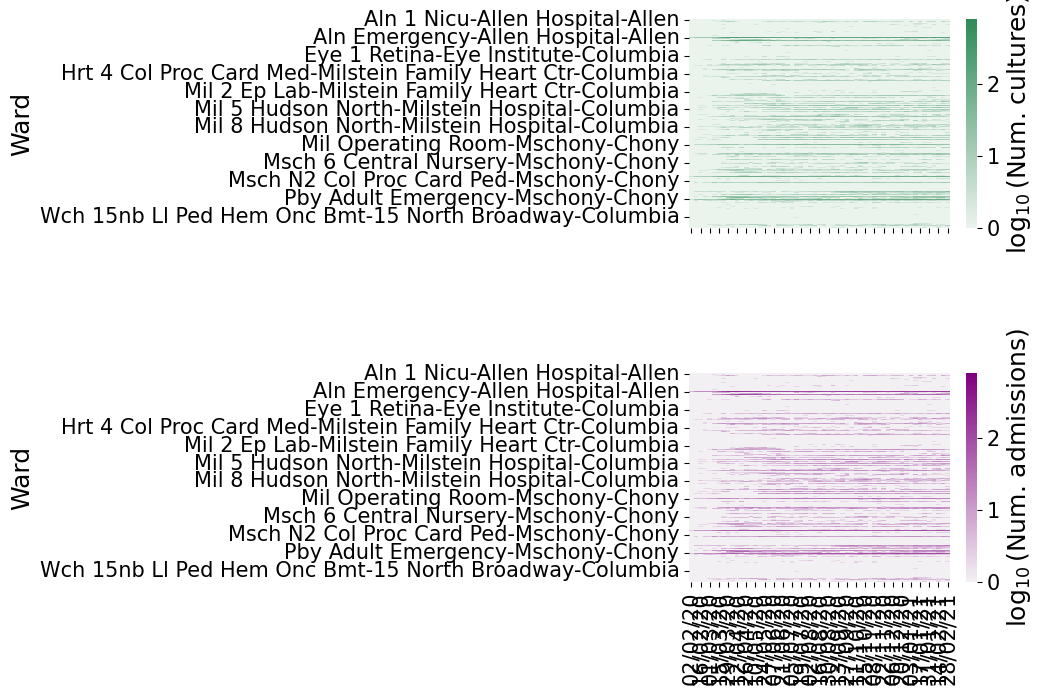

In [21]:
from utils_local import plot_utils
import matplotlib.pyplot as plt
import seaborn as sns

xx_ticks = ['02-Feb-20', '', '15-Mar-20', '', '26-Apr-20', '', '07-Jun-20', '', '19-Jul-20', '',
            '30-Aug-20', '', '11-Oct-20', '', '22-Nov-20', '', '03-Jan-21', '', '14-Feb-21']

fig, ax  = plt.subplots(2, 1, figsize=(10.5, 7.2), sharex=True, sharey=True)

g = sns.heatmap(ax=ax[0], data=np.log10(testing_mat_per_ward_df+1), cmap=sns.light_palette("seagreen", as_cmap=True), cbar_kws={'label': r"$\log_{{10}}$(Num. cultures)"})
ax[0].set_xlabel(None)

#g.set(yticklabels=['0','', r'$\vdots$','','115','',r'$\vdots$','','210'])
#g.set(xticklabels=xx_ticks)

g = sns.heatmap(ax=ax[1], data=np.log10(admissions_mat_per_ward_df+1), cmap=sns.light_palette("purple", as_cmap=True), cbar_kws={'label': r"$\log_{{10}}$(Num. admissions)"})
#ax[1].set_xlabel("Date (weekly)")
ax[0].set_ylabel("Ward")
ax[1].set_ylabel("Ward")
ax[1].set_xlabel(None)

#g.set(yticklabels=['0','','', r'$\vdots$','','','115','',r'$\vdots$','','','210'])
#g.set(yticklabels=['0','', r'$\vdots$','','115','',r'$\vdots$','','210'])
#g.set(xticklabels=xx_ticks)

plt.tight_layout()
plt.subplots_adjust(hspace=0.7)

#path_to_save  = os.path.join(path_to_ms_figs, "heatmaps_test_admission.png")
#fig.savefig(path_to_save, dpi=300, transparent=True)
